# Quantium Virtual Internship - Retail Strategy and Analytics 

### Task 1 - Data preparation and customer analytics
Conduct analysis on client's transaction dataset and identify customer purchasing behaviours 

#### Required libraries are imported

In [325]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

#### The dataset on transaction and customer are uploaded. 

In [326]:
#csv data uploaded
transaction_data=pd.read_csv("/quantium_forage_project/QVI_transaction_data.csv")
customer_data=pd.read_csv("/quantium_forage_project/QVI_purchase_behaviour.csv")

#### The first five rows of both transaction and customer dataset. 

In [327]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [328]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


#### Shape of the dataset

The transaction dataset has 264836 rows and 8 columns. 

In [329]:
transaction_data.shape

(264836, 8)

The customer dataset has 72637 rows and 3 columns

In [330]:
customer_data.shape

(72637, 3)

#### Check missing values in both transaction and customer dataset

There are zero missing values in transaction dataset.

In [331]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

There are zero missing values in customer dataset. 

In [332]:
customer_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

#### Merging of transaction and customer dataset

In [333]:
#merged dataset; transaction data and customer data
merged_dataset=pd.merge(transaction_data, customer_data, how='right', on='LYLTY_CARD_NBR')
merged_dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


#### Data types 

In [334]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
DATE                264836 non-null int64
STORE_NBR           264836 non-null int64
LYLTY_CARD_NBR      264836 non-null int64
TXN_ID              264836 non-null int64
PROD_NBR            264836 non-null int64
PROD_NAME           264836 non-null object
PROD_QTY            264836 non-null int64
TOT_SALES           264836 non-null float64
LIFESTAGE           264836 non-null object
PREMIUM_CUSTOMER    264836 non-null object
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


#### Check the missing values in the merged dataset

There are zero missing values in the new merged dataset. 

In [335]:
merged_dataset.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

#### Shape of the new merged dataset

There are 246740 rows and 13 columns in the new merged dataset. 

In [336]:
merged_dataset.shape

(264836, 10)

#### The first five rows of the merged dataset

In [416]:
#sample of the data
merged_dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Prod_chips,prodpack_size,brand_name
96974,2018-07-01,229,229079,230838,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,OLDER SINGLES/COUPLES,Budget,Doritos Corn Chips Nacho Cheese,170,Doritos
150543,2018-07-01,21,21037,17576,62,Pringles Mystery Flavour 134g,2,7.4,RETIREES,Mainstream,Pringles Mystery Flavour,134,Pringles
190909,2018-07-01,40,40204,37044,81,Pringles Original Crisps 134g,2,7.4,YOUNG FAMILIES,Budget,Pringles OriginalCrisps,134,Pringles
100620,2018-07-01,109,109152,111085,81,Pringles Original Crisps 134g,2,7.4,OLDER SINGLES/COUPLES,Mainstream,Pringles OriginalCrisps,134,Pringles
216505,2018-07-01,263,263082,262683,29,French Fries Potato Chips 175g,2,6.0,YOUNG FAMILIES,Mainstream,French Fries Potato Chips,175,French


# Data Preprocessing

#### Integer date column to date format is converted

In [338]:
merged_dataset['DATE']=pd.to_datetime(merged_dataset['DATE'], unit='D', origin='1899-12-30')
merged_dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


#### Summary of PROD_NAME
There are 114 unique products. 

In [339]:
#summary of prod_name
summary_prod_name=merged_dataset['PROD_NAME'].describe().to_frame()
summary_prod_name

,PROD_NAME
count,264836
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304


#### Check the unique product's names and its frequency

Kettle seems to be top brand for the chips by look at its frequency.

In [340]:
#remove non-chips items from prod_name
#unique, frequency

unique_prod_name=pd.DataFrame(merged_dataset['PROD_NAME'].value_counts()).reset_index()
unique_prod_name=unique_prod_name.rename(columns={'index':'Product Name','PROD_NAME':'Frequency'})
unique_prod_name

,Product Name,Frequency
0,Kettle Mozzarella Basil & Pesto 175g,3304
1,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
2,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
3,Tyrrells Crisps Ched & Chives 165g,3268
4,Cobs Popd Sea Salt Chips 110g,3265
...,...,...
109,RRD Pc Sea Salt 165g,1431
110,Woolworths Medium Salsa 300g,1430
111,NCC Sour Cream & Garden Chives 175g,1419
112,French Fries Potato Chips 175g,1418


#### Clean PROD_NAME column
The special characters and digits are removed

In [341]:
#remove special characters and digits

merged_dataset['Prod_chips']=merged_dataset['PROD_NAME'].apply(lambda x:x.replace('/',' ').replace('&',' '))
merged_dataset['Prod_chips']=merged_dataset['Prod_chips'].str.replace('\d+',' ')
merged_dataset['Prod_chips']=merged_dataset['Prod_chips'].apply(lambda x:x.split(' g')[0])
merged_dataset['Prod_chips']=merged_dataset['Prod_chips'].apply(lambda x:x.replace('   ',''))
merged_dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Prod_chips
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW Original Stacked Chips
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs Original
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken


#### Salsa product are removed
As we are focusing on chips, it is not good for our anlaysis to include Salsa products. 

In [342]:
#remove salsa products
merged_dataset=merged_dataset[merged_dataset['Prod_chips'].str.contains('Salsa')==False]
merged_dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Prod_chips
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW Original Stacked Chips
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs Original
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken


#### View some statistical details of the merged dataset
We can view an outlier in PROD_QTY. Let's deal with it. 

In [343]:
merged_dataset.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


#### Check PROD_QTY 
There are only two transactions with PROD_QTY as 200

In [344]:
#checking outlier; a customer made 200 qty orders
td=merged_dataset[(merged_dataset['PROD_QTY']==200)]
td

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Prod_chips
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Dorito Corn Chp Supreme
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Dorito Corn Chp Supreme


#### Check that cusotmer's transaction who bought 200 chips
It shows that there are only two big transactions made by the customer over the year. The customer might be buying chips for commercial purposes and doesn't align with other customer's purchase behavior. I decided to remove the data from further analysis. 

In [345]:
#now lets check that customer data based on loyalty card number
td1=merged_dataset[(merged_dataset['LYLTY_CARD_NBR']==226000)]
td1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Prod_chips
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Dorito Corn Chp Supreme
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Dorito Corn Chp Supreme


#### New dataset without the loyal card number of the cusotmer who made two big transaction. 

In [346]:
merged_dataset=merged_dataset[merged_dataset['LYLTY_CARD_NBR']!=226000]
merged_dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Prod_chips
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW Original Stacked Chips
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs Original
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken


#### Count the number of transactions by date

In [347]:
#count the number of transactions by date
trannum=merged_dataset['DATE'].value_counts().reset_index()
trannum=trannum.rename(columns={'index':'Date','DATE':'Num_of_tran'})

#### Summary of the transactions by date

There are 364 unique dates. The first transaction was on 2018-07-01 and the last transaction was on 2019-06-30.

In [348]:
#summary of transaction count by date
merged_dataset['DATE'].describe()

count                  246740
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

#### A sequence of dates from 1July2018 to 30June2019

In [349]:
#12_create a sequence of dates from 1July2018 to 30June2019
#find a missing date
merged_dataset.sort_values(by='DATE', inplace=True)
merged_dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Prod_chips
96974,2018-07-01,229,229079,230838,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,OLDER SINGLES/COUPLES,Budget,Doritos Corn Chips Nacho Cheese
150543,2018-07-01,21,21037,17576,62,Pringles Mystery Flavour 134g,2,7.4,RETIREES,Mainstream,Pringles Mystery Flavour
190909,2018-07-01,40,40204,37044,81,Pringles Original Crisps 134g,2,7.4,YOUNG FAMILIES,Budget,Pringles OriginalCrisps
100620,2018-07-01,109,109152,111085,81,Pringles Original Crisps 134g,2,7.4,OLDER SINGLES/COUPLES,Mainstream,Pringles OriginalCrisps
216505,2018-07-01,263,263082,262683,29,French Fries Potato Chips 175g,2,6.0,YOUNG FAMILIES,Mainstream,French Fries Potato Chips


#### Plot transaction over time
If we zoon the plot, there is an increase in purchases in December. This plot will help to find out the missing date as we only have data on 364 dates. 

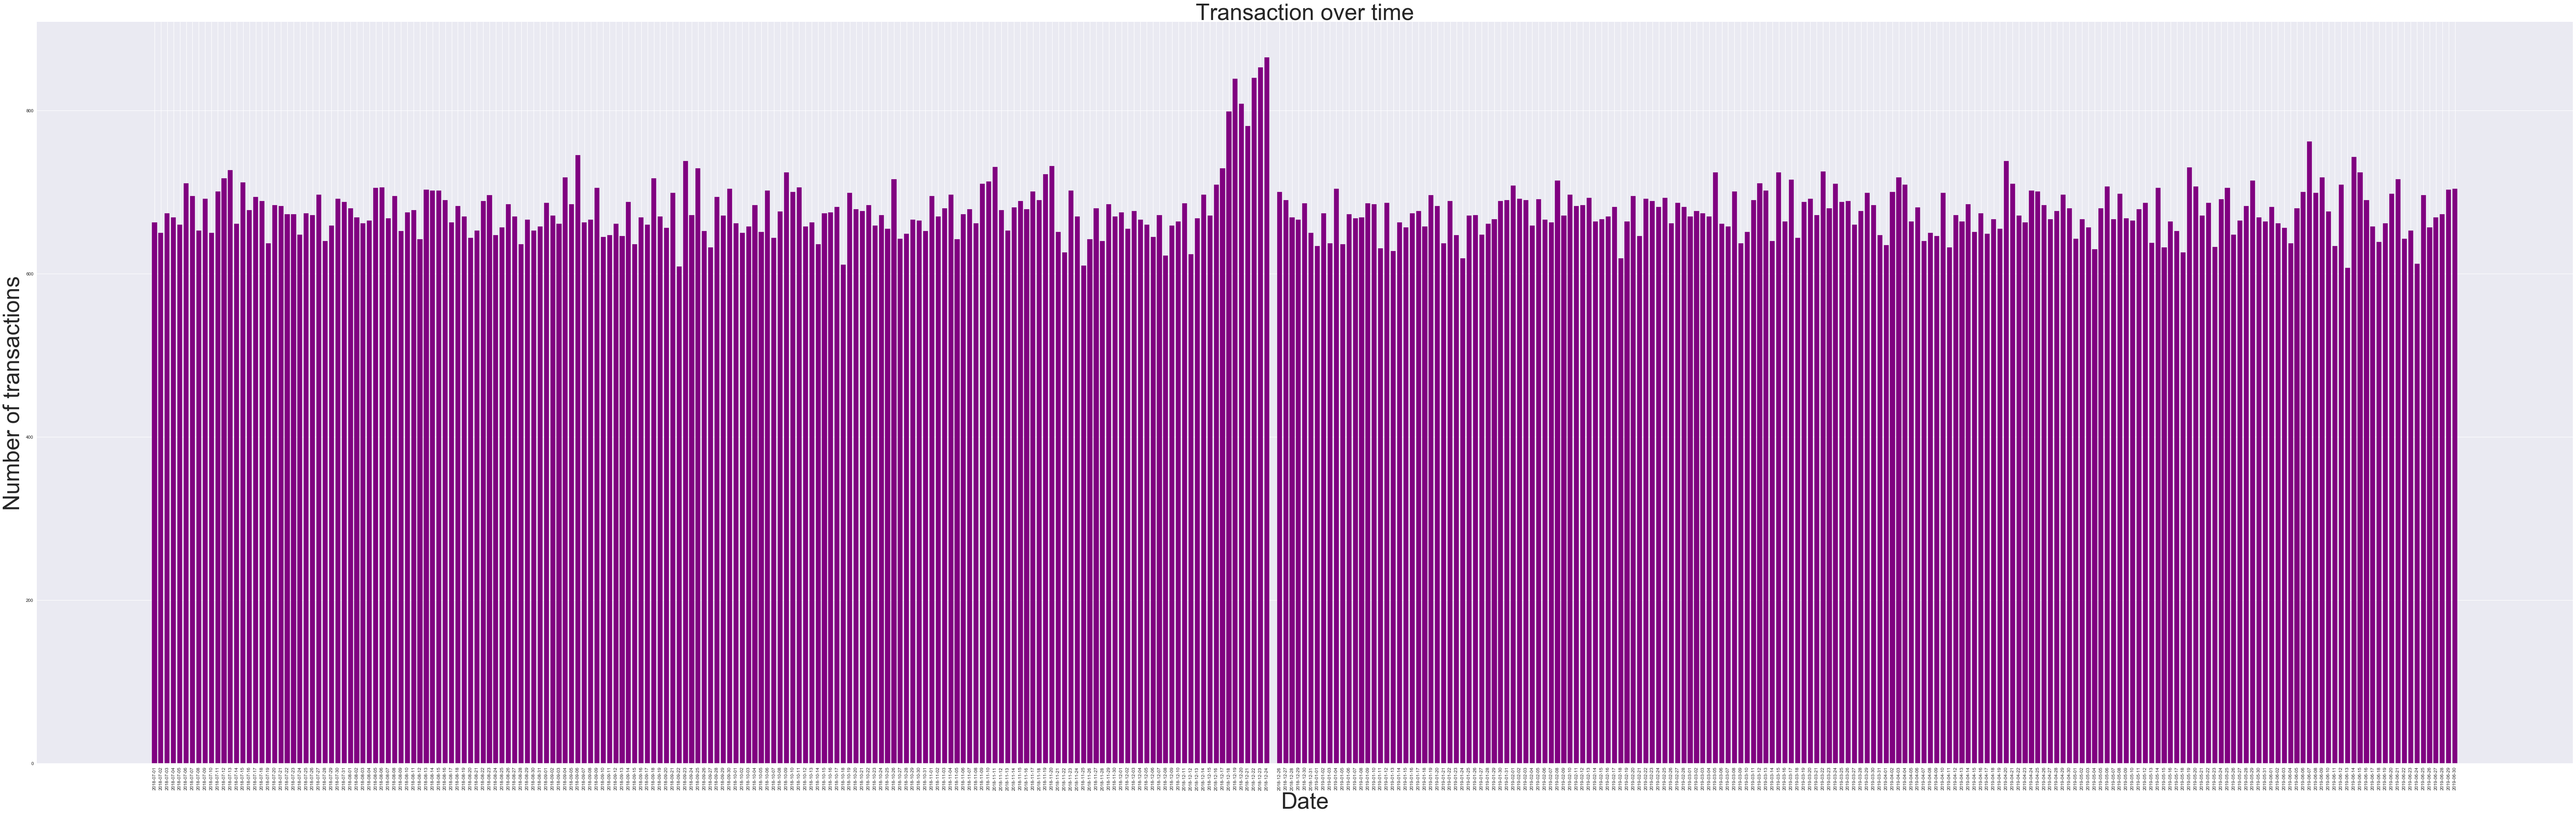

In [386]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(100,30))

# Add x-axis and y-axis
ax.bar(trannum['Date'],trannum['Num_of_tran'], color='purple')

# Set title and labels for axes
plt.xlabel("Date", fontsize=50)
plt.ylabel("Number of transactions", fontsize=50)
plt.title('Transaction over time', fontsize=50)

plt.xticks(rotation=90)
plt.xticks(trannum['Date'])
plt.show()

#### Plot transaction of December
We can see there is a gap in the plot which is around December if we zoom the plot. We can break into late December.

In [389]:
date_month=merged_dataset[merged_dataset['DATE'].dt.month==12] #december
date_month1=date_month['DATE'].value_counts(ascending=False).to_frame().reset_index()
date_month1=date_month1.rename(columns={'index':'2018_December', 'DATE': 'Number_of_tran'})
date_month1.head()

,2018_December,Number_of_tran
0,2018-12-24,865
1,2018-12-23,853
2,2018-12-22,840
3,2018-12-19,839
4,2018-12-20,808


#### Recreate the chart for December dataset
We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself (2018-12-25). This is due to shops being closed on Christmas day.

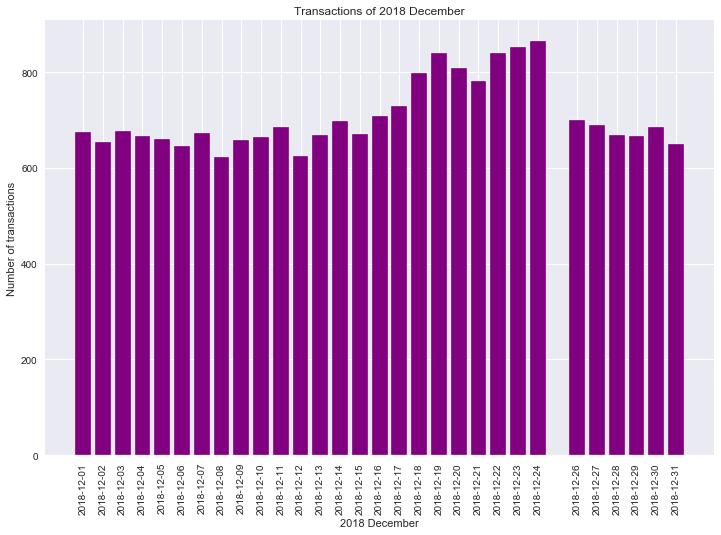

In [417]:
fig, ax = plt.subplots(figsize=(12,8))

# Add x-axis and y-axis
ax.bar(date_month1['2018_December'],date_month1['Number_of_tran'], color='purple')

# Set title and labels for axes
ax.set(xlabel="2018 December",
       ylabel="Number of transactions",
       title="Transactions of 2018 December")

plt.xticks(rotation=90)
plt.xticks(date_month1['2018_December'])
plt.show()

#### Review pack size
A new column prodpack_size is created. It shows pack size of the products. 

In [390]:
merged_dataset['prodpack_size']=merged_dataset['PROD_NAME'].str.extract('(\d+)')
merged_dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Prod_chips,prodpack_size,brand_name
96974,2018-07-01,229,229079,230838,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,OLDER SINGLES/COUPLES,Budget,Doritos Corn Chips Nacho Cheese,170,Doritos
150543,2018-07-01,21,21037,17576,62,Pringles Mystery Flavour 134g,2,7.4,RETIREES,Mainstream,Pringles Mystery Flavour,134,Pringles
190909,2018-07-01,40,40204,37044,81,Pringles Original Crisps 134g,2,7.4,YOUNG FAMILIES,Budget,Pringles OriginalCrisps,134,Pringles
100620,2018-07-01,109,109152,111085,81,Pringles Original Crisps 134g,2,7.4,OLDER SINGLES/COUPLES,Mainstream,Pringles OriginalCrisps,134,Pringles
216505,2018-07-01,263,263082,262683,29,French Fries Potato Chips 175g,2,6.0,YOUNG FAMILIES,Mainstream,French Fries Potato Chips,175,French


#### Summary of product size
The average pack size is 175 grams. The maximum pack size sold is 380 grams. The minimum size is 70 grams. 

In [354]:
#15_summary of product size
merged_dataset.info()

merged_dataset['prodpack_size']=merged_dataset['prodpack_size'].astype(int)
merged_dataset['prodpack_size'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 96974 to 8608
Data columns (total 12 columns):
DATE                246740 non-null datetime64[ns]
STORE_NBR           246740 non-null int64
LYLTY_CARD_NBR      246740 non-null int64
TXN_ID              246740 non-null int64
PROD_NBR            246740 non-null int64
PROD_NAME           246740 non-null object
PROD_QTY            246740 non-null int64
TOT_SALES           246740 non-null float64
LIFESTAGE           246740 non-null object
PREMIUM_CUSTOMER    246740 non-null object
Prod_chips          246740 non-null object
prodpack_size       246740 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 24.5+ MB


count    246740.000000
mean        175.583521
std          59.432118
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: prodpack_size, dtype: float64

#### The number of transactions by pack size

In [393]:
#showing the number of transaction by pack size
packsize_tran=merged_dataset['prodpack_size'].value_counts().to_frame().reset_index()
packsize_tran=packsize_tran.rename(columns={'index':'pack_size','prodpack_size':'number_of_tran'})
packsize_tran.head(5)

,pack_size,number_of_tran
0,175,66390
1,150,40203
2,134,25102
3,110,22387
4,170,19983


#### Histogram showing the number of transactions by pack size

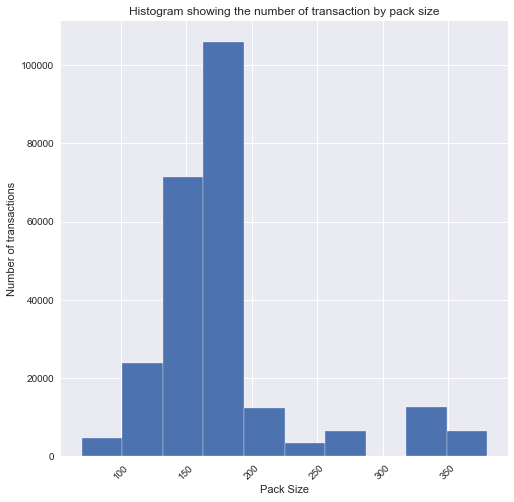

In [356]:
fig, ax = plt.subplots(figsize=(8,8))

# Add x-axis and y-axis
ax.hist(merged_dataset['prodpack_size'])

# Set title and labels for axes
ax.set(xlabel="Pack Size",
       ylabel="Number of transactions",
       title="Histogram showing the number of transaction by pack size")

plt.xticks(rotation=45)
#plt.xticks(merged_dataset['prodpack_size'])
plt.show()

#### Brands of chips
Brand names are extracted from PROD_NAME. A new column brand_name is created. 

In [401]:
#create brands from PROD_NAME
merged_dataset['brand_name']=merged_dataset['PROD_NAME'].apply(lambda x:x.split(' ')[0])
merged_dataset.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Prod_chips,prodpack_size,brand_name
96974,2018-07-01,229,229079,230838,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,OLDER SINGLES/COUPLES,Budget,Doritos Corn Chips Nacho Cheese,170,Doritos
150543,2018-07-01,21,21037,17576,62,Pringles Mystery Flavour 134g,2,7.4,RETIREES,Mainstream,Pringles Mystery Flavour,134,Pringles


##### Checking brands

Some brand names are repeated. For e.g. Dorito and Doritos are single brand Doritos. 

In [404]:
review_brands=merged_dataset['brand_name'].value_counts().to_frame().reset_index()
review_brands=review_brands.rename(columns={'index':'brand_name','brand_name':'number_of_tran'})
review_brands.sort_values('brand_name')

,brand_name,number_of_tran
22,Burger,1564
15,CCs,4551
20,Cheetos,2927
14,Cheezels,4603
8,Cobs,9693
17,Dorito,3183
3,Doritos,22041
27,French,1418
12,Grain,6272
24,GrnWves,1468


#### Brand adjustments as there are similar brand names in the dataset

The adjustments like Dorito to Doritos, GrnWaves to Grain, Infzns to Influzions, Natural to NCC, Red to RRD, Smith to Smiths, Snbts to Sunbites and WW to Woolworths. They are similar brands.

In [358]:
#brand adjustments as there are similar brand names
#Doritos Dorito #Grain GrnWves #Infuzions Infzns #Natural NCC #RRD Red
#Smith Smiths #Snbts Sunbites #WW Woolworths

merged_dataset['brand_name']=merged_dataset['brand_name'].apply(lambda x:x.replace('Dorito','Doritos'))
merged_dataset['brand_name']=merged_dataset['brand_name'].apply(lambda x:x.replace('Doritoss','Doritos'))
merged_dataset['brand_name']=merged_dataset['brand_name'].apply(lambda x:x.replace('GrnWves','Grain'))
merged_dataset['brand_name']=merged_dataset['brand_name'].apply(lambda x:x.replace('Infzns','Influzions'))
merged_dataset['brand_name']=merged_dataset['brand_name'].apply(lambda x:x.replace('Natural','NCC'))
merged_dataset['brand_name']=merged_dataset['brand_name'].apply(lambda x:x.replace('Red','RRD'))
merged_dataset['brand_name']=merged_dataset['brand_name'].apply(lambda x:x.replace('Smith','Smiths'))
merged_dataset['brand_name']=merged_dataset['brand_name'].apply(lambda x:x.replace('Smithss','Smiths'))
merged_dataset['brand_name']=merged_dataset['brand_name'].apply(lambda x:x.replace('Snbts','Sunbites'))
merged_dataset['brand_name']=merged_dataset['brand_name'].apply(lambda x:x.replace('WW','Woolworths'))

merged_dataset.head()

merged_dataset['brand_name'].value_counts()

Kettle        41288
Smiths        30353
Doritos       25224
Pringles      25102
RRD           16321
Thins         14075
Woolworths    11836
Infuzions     11057
Cobs           9693
Tostitos       9471
Twisties       9454
Grain          7740
NCC            7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Influzions     3144
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: brand_name, dtype: int64

# Exploratory Data Analysis

#### Data analysis on customer segments

Checking on lifestage as there are older singles/couples, retirees, older families, young families and young single/couples; Mostly, older singles/couples group like to have chips

In [405]:
#LIFESTAGE and PREMIUM CUSTOMER
#LIFESTAGE
sales_byLifestage=merged_dataset['LIFESTAGE'].value_counts().to_frame().reset_index()
sales_byLifestage=sales_byLifestage.rename(columns={'index':'LIFESTAGE','LIFESTAGE':'total_sales'})
sales_byLifestage.head()

,LIFESTAGE,total_sales
0,OLDER SINGLES/COUPLES,50793
1,RETIREES,46431
2,OLDER FAMILIES,45158
3,YOUNG FAMILIES,40494
4,YOUNG SINGLES/COUPLES,33969


#### Plot (Total Sales by Lifestage)

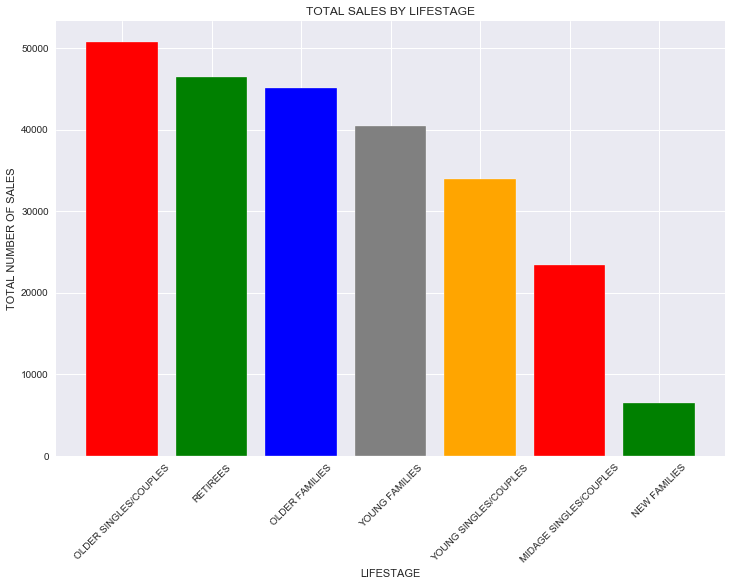

In [406]:
#plot
fig, ax = plt.subplots(figsize=(12,8))

# Add x-axis and y-axis
ax.bar(sales_byLifestage['LIFESTAGE'],sales_byLifestage['total_sales'], color=['red','green','blue','grey','orange'])

# Set title and labels for axes
ax.set(xlabel="LIFESTAGE",
       ylabel="TOTAL NUMBER OF SALES",
       title="TOTAL SALES BY LIFESTAGE")

plt.xticks(rotation=45)
#plt.xticks(date_month1['2018_December'])
plt.show()

#### Checking premium customers
The mainstream group is likely to buy more chips followed by Budget and Premium groups.

In [361]:
#PREMIUM_CUSTOMER
sales_byPremiumcust=merged_dataset['PREMIUM_CUSTOMER'].value_counts().to_frame().reset_index()
sales_byPremiumcust=sales_byPremiumcust.rename(columns={'index':'PREMIUM_CUSTOMER','PREMIUM_CUSTOMER':'total_sales'})
sales_byPremiumcust.head()

,PREMIUM_CUSTOMER,total_sales
0,Mainstream,95043
1,Budget,86762
2,Premium,64935


#### Plot (Total Sales by Premium Customer)

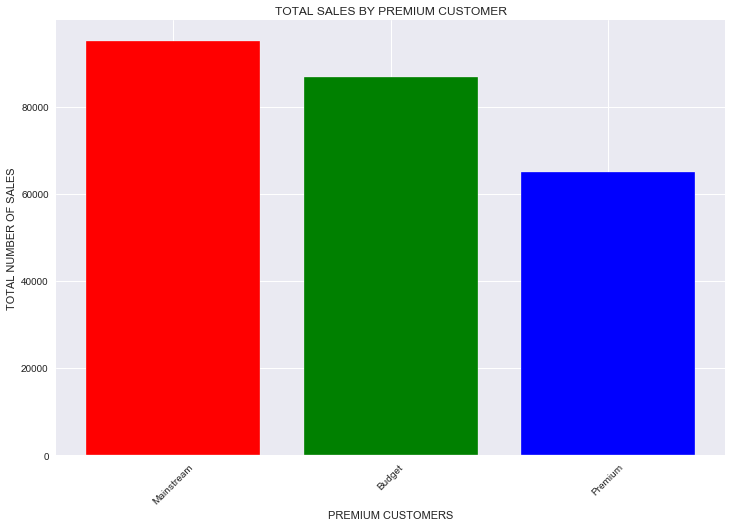

In [362]:
#plot
fig, ax = plt.subplots(figsize=(12,8))

# Add x-axis and y-axis
ax.bar(sales_byPremiumcust['PREMIUM_CUSTOMER'],sales_byPremiumcust['total_sales'], color=['red','green','blue'])

# Set title and labels for axes
ax.set(xlabel="PREMIUM CUSTOMERS",
       ylabel="TOTAL NUMBER OF SALES",
       title="TOTAL SALES BY PREMIUM CUSTOMER")

plt.xticks(rotation=45)
#plt.xticks(date_month1['2018_December'])
plt.show()

#### Total sales by LIFESTAGE and PREMIUM CUSTOMERS
The sales are mainly due to older families/budget, young singles and couples/mainstream and retirees/mainstream. 

In [418]:
#Total sales by LIFESTAGE and PREMIUM CUSTOMERS
sales_lifes_premc=pd.pivot_table(merged_dataset, index=['LIFESTAGE','PREMIUM_CUSTOMER'], values=['TOT_SALES'], aggfunc='sum')
sales_lifes_premc=sales_lifes_premc.sort_values(ascending=False, by='TOT_SALES')
sales_lifes_premc

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
OLDER FAMILIES         Budget            156863.75
YOUNG SINGLES/COUPLES  Mainstream        147582.20
RETIREES               Mainstream        145168.95
YOUNG FAMILIES         Budget            129717.95
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
OLDER FAMILIES         Mainstream         96413.55
RETIREES               Premium            91296.65
YOUNG FAMILIES         Mainstream         86338.25
MIDAGE SINGLES/COUPLES Mainstream         84734.25
YOUNG FAMILIES         Premium            78571.70
OLDER FAMILIES         Premium            75242.60
YOUNG SINGLES/COUPLES  Budget             57122.10
MIDAGE SINGLES/COUPLES Premium            54443.85
YOUNG SINGLES/COUPLES  Premium            39052.30
MIDAGE SINGLES/COUPLES Budget             33345.70
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80

#### Plot (Total sales by Lifestage and Premium Customers)

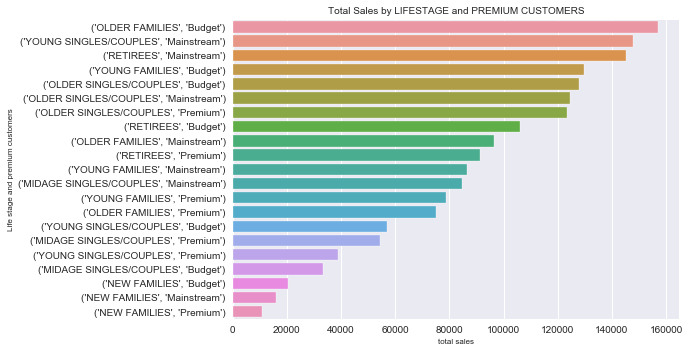

In [364]:
#PLOT
import seaborn as sns

chart1=sns.barplot(x=sales_lifes_premc['TOT_SALES'], y=sales_lifes_premc.index)
plt.xlabel('total sales', fontsize=8)
plt.ylabel('Life stage and premium customers', fontsize=8)
plt.title('Total Sales by LIFESTAGE and PREMIUM CUSTOMERS', fontsize=10)
plt.show()

#### Number of customers by LIFESTAGE and PREMIUM CUSTOMERS
The older families who are in budget are in top in terms of the highest numbers of the customers who bought chips. It is followed by retirees/mainstream and young singles and couples/mainstream. This supports our understanding that mainstream group consumes more chips compare to other customer groups. 

In [419]:
#number of customers by LIFESTAGE and PREMIUM CUSTOMERS
cust_lifes_premc=pd.pivot_table(merged_dataset, index=['LIFESTAGE','PREMIUM_CUSTOMER'], values=['TOT_SALES'], aggfunc='count')
cust_lifes_premc=cust_lifes_premc.sort_values(ascending=False, by='TOT_SALES')
cust_lifes_premc=cust_lifes_premc.rename(columns={'TOT_SALES':'TOT_NMBR_CUSTOMERS'})
cust_lifes_premc

TOT_NMBR_CUSTOMERS
LIFESTAGE              PREMIUM_CUSTOMER                    
OLDER FAMILIES         Budget                         21514
RETIREES               Mainstream                     19970
YOUNG SINGLES/COUPLES  Mainstream                     19544
YOUNG FAMILIES         Budget                         17763
OLDER SINGLES/COUPLES  Budget                         17172
                       Mainstream                     17061
                       Premium                        16560
RETIREES               Budget                         14225
OLDER FAMILIES         Mainstream                     13241
RETIREES               Premium                        12236
YOUNG FAMILIES         Mainstream                     11947
MIDAGE SINGLES/COUPLES Mainstream                     11095
YOUNG FAMILIES         Premium                        10784
OLDER FAMILIES         Premium                        10403
YOUNG SINGLES/COUPLES  Budget                          8573
MIDAGE SINGLES/COUPLES Premium                         7612
YOUNG SINGLES/COUPLES  Premium                         5852
MIDAGE SINGLES/COUPLES Budget                          4691
NEW FAMILIES           Budget                          2824
                       Mainstream                      2185
                       Premium                         1488

#### PLOT (Number of customers by Lifestage and Premium customers)

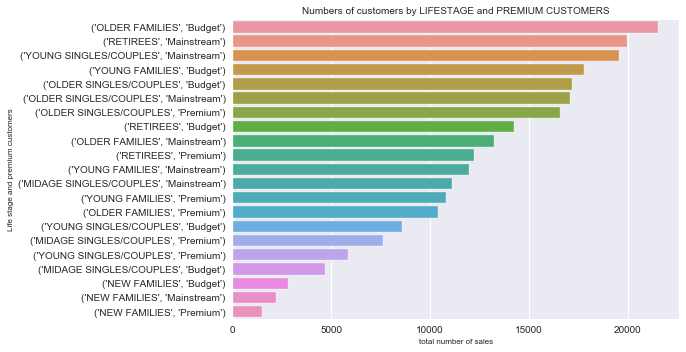

In [366]:
#PLOT
chart2=sns.barplot(x=cust_lifes_premc['TOT_NMBR_SALES'], y=cust_lifes_premc.index)
plt.xlabel('total number of sales', fontsize=8)
plt.ylabel('Life stage and premium customers', fontsize=8)
plt.title('Numbers of customers by LIFESTAGE and PREMIUM CUSTOMERS', fontsize=10)
plt.show()

#### Average number of units per customer by LIFESTAGE and PREMIUM CUSTOMER
Midage singles/couples tops the list having average number of units per customer. It is followed by young singles/couples from the same group that is Mainstream. 

In [413]:
#average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

avg_lifes_premc=pd.pivot_table(merged_dataset, index=['LIFESTAGE','PREMIUM_CUSTOMER'], values=['TOT_SALES'], aggfunc='mean')
avg_lifes_premc=avg_lifes_premc.rename(columns={'TOT_SALES':'AVG_SALES'})
avg_lifes_premc=avg_lifes_premc.sort_values(ascending=False, by='AVG_SALES')
avg_lifes_premc

,,AVG_SALES
LIFESTAGE,PREMIUM_CUSTOMER,
MIDAGE SINGLES/COUPLES,Mainstream,7.637156
YOUNG SINGLES/COUPLES,Mainstream,7.551279
RETIREES,Premium,7.461315
OLDER SINGLES/COUPLES,Premium,7.459997
RETIREES,Budget,7.445786
OLDER SINGLES/COUPLES,Budget,7.444305
NEW FAMILIES,Mainstream,7.313364
OLDER SINGLES/COUPLES,Mainstream,7.306049
YOUNG FAMILIES,Budget,7.302705


#### Plot (Average number of units per customer by LIFESTAGE and PREMIUM CUSTOMERS)

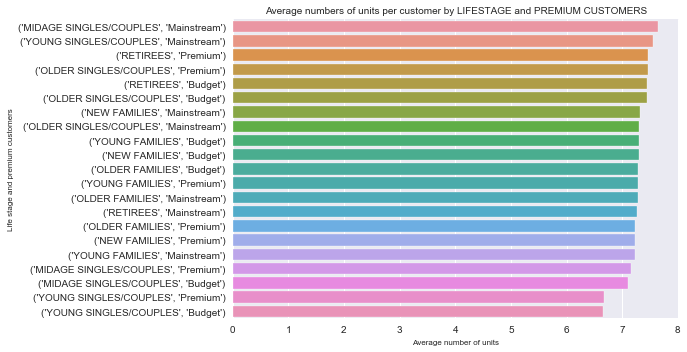

In [368]:
#PLOT
chart3=sns.barplot(x=avg_lifes_premc['AVG_SALES'], y=avg_lifes_premc.index)
plt.xlabel('Average number of units', fontsize=8)
plt.ylabel('Life stage and premium customers', fontsize=8)
plt.title('Average numbers of units per customer by LIFESTAGE and PREMIUM CUSTOMERS', fontsize=10)
plt.show()

#### An independent t-test between mainstream midage and young singles and couples and budget and premium groups
The t-test results p-value < 1.8346459081805317e-237, i.e. the unit price for mainstream, young and mid-age singles and couples ARE significantly higher than that of budget or premium, young and midage singles and couples.

In [415]:
#perform an independent t-test
prem_mainstream = merged_dataset["PREMIUM_CUSTOMER"] == "Mainstream"
life_young_midage = (merged_dataset["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (merged_dataset["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")
budget_premium = (merged_dataset["PREMIUM_CUSTOMER"] == "Budget") | (merged_dataset["PREMIUM_CUSTOMER"] == "Premium")

a = merged_dataset[life_young_midage & prem_mainstream]["TOT_SALES"]
b = merged_dataset[life_young_midage & budget_premium]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(stat, pval)

33.06748508665197 1.8346459081805317e-237


#### Brand preferences
Brand preferences amongst Budget/Older Families: Kettle is highly preferred followed by Smith's and Doritos.

In [425]:
#BRAND PREFERENCES amongst various customer segments
brand_pref=merged_dataset.groupby(['brand_name','LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].count().reset_index()
brand_pref=brand_pref.sort_values(ascending=False, by='TOT_SALES')
brand_pref.head()

,brand_name,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
271,Kettle,YOUNG SINGLES/COUPLES,Mainstream,3844
265,Kettle,RETIREES,Mainstream,3386
258,Kettle,OLDER FAMILIES,Budget,3320
261,Kettle,OLDER SINGLES/COUPLES,Budget,3065
263,Kettle,OLDER SINGLES/COUPLES,Premium,2947


In [424]:
#Brand preferences amongst Older Families/Budget
data1=merged_dataset[(merged_dataset['PREMIUM_CUSTOMER']=='Budget') & (merged_dataset['LIFESTAGE']=='OLDER FAMILIES')]
data1=data1[['LIFESTAGE','PREMIUM_CUSTOMER', 'brand_name']]
top_brand1=data1['brand_name'].value_counts().reset_index()
top_brand1=top_brand1.rename(columns={'index':'Popular brands for Older Families/Budget','brand_name':'num_of_brands'})
top_brand1

,Popular brands for Older Families/Budget,num_of_brands
0,Kettle,3320
1,Smiths,2640
2,Pringles,1996
3,Doritos,1784
4,RRD,1218
5,Thins,1171
6,WW,1057
7,Infuzions,908
8,Twisties,810
9,Cobs,760


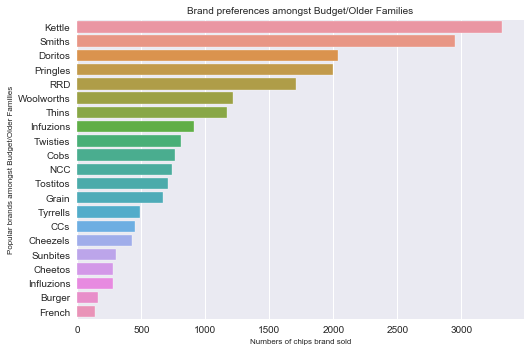

In [371]:
#plot
chart4=sns.barplot(x=top_brand1['num_of_brands'], y=top_brand1['Popular brands for Budget/Older Families'])
plt.xlabel('Numbers of chips brand sold', fontsize=8)
plt.ylabel('Popular brands amongst Budget/Older Families', fontsize=8)
plt.title('Brand preferences amongst Budget/Older Families', fontsize=10)
plt.show()

#### Brand preferences amongst Mainstream and Young Singles/Couples
Kettle is highly preferred followed by Doritos and Pringles. 

In [426]:
data2=merged_dataset[(merged_dataset['PREMIUM_CUSTOMER']=='Mainstream') & (merged_dataset['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]
data2=data2[['LIFESTAGE','PREMIUM_CUSTOMER', 'brand_name']]
top_brand2=data2['brand_name'].value_counts().reset_index()
top_brand2=top_brand2.rename(columns={'index':'Popular brands for Mainstream and Young Singles/Couples','brand_name':'num_of_brands'})
top_brand2

,Popular brands for Mainstream and Young Singles/Couples,num_of_brands
0,Kettle,3844
1,Pringles,2315
2,Doritos,2076
3,Smiths,1790
4,Thins,1166
5,Infuzions,962
6,Twisties,900
7,Tostitos,890
8,Cobs,864
9,RRD,639


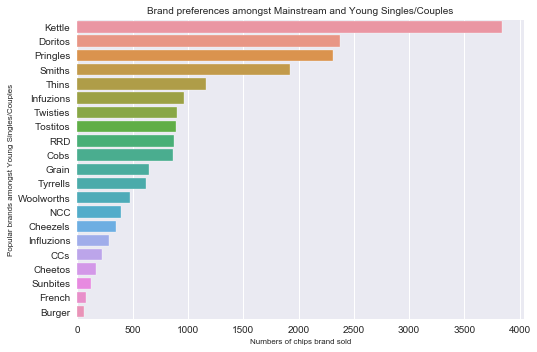

In [373]:
#plot
chart5=sns.barplot(x=top_brand2['num_of_brands'], y=top_brand2['Popular brands for Mainstream and Young Singles/Couples'])
plt.xlabel('Numbers of chips brand sold', fontsize=8)
plt.ylabel('Popular brands amongst Young Singles/Couples', fontsize=8)
plt.title('Brand preferences amongst Mainstream and Young Singles/Couples', fontsize=10)
plt.show()

#### Brand preferences amongst Mainstream/Retires
Ketlle is highly preferred followed by Smith's and Pringles. 

In [427]:
data3=merged_dataset[(merged_dataset['PREMIUM_CUSTOMER']=='Mainstream') & (merged_dataset['LIFESTAGE']=='RETIREES')]
data3=data3[['LIFESTAGE','PREMIUM_CUSTOMER', 'brand_name']]
top_brand3=data3['brand_name'].value_counts().reset_index()
top_brand3=top_brand3.rename(columns={'index':'Popular brands for Mainstream/Retirees','brand_name':'num_of_brands'})
top_brand3

,Popular brands for Mainstream/Retirees,num_of_brands
0,Kettle,3386
1,Smiths,2122
2,Pringles,2103
3,Doritos,1838
4,Thins,1199
5,Infuzions,909
6,RRD,863
7,Twisties,802
8,WW,797
9,Cobs,776


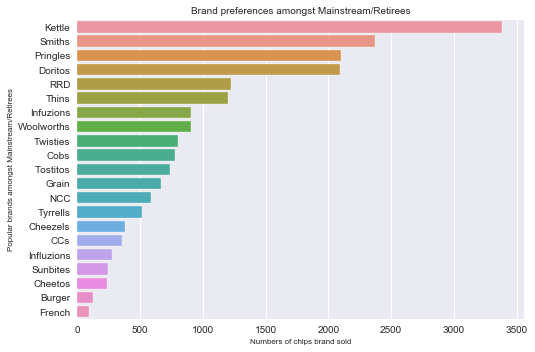

In [375]:
#plot
chart6=sns.barplot(x=top_brand3['num_of_brands'], y=top_brand3['Popular brands for Mainstream/Retirees'])
plt.xlabel('Numbers of chips brand sold', fontsize=8)
plt.ylabel('Popular brands amongst Mainstream/Retirees', fontsize=8)
plt.title('Brand preferences amongst Mainstream/Retirees', fontsize=10)
plt.show()

#### Packsize
Generally, 175 grams is the most popular chips pack size. 

In [414]:
data4=pd.pivot_table(merged_dataset, index=['PREMIUM_CUSTOMER','LIFESTAGE'], values=['prodpack_size'], aggfunc=['max','count'])
data4=data4.reset_index().sort_values(ascending=False, by=('count','prodpack_size'))

#popular packsize
data6=merged_dataset['prodpack_size'].value_counts(ascending=False)
data6.head()

175    66390
150    40203
134    25102
110    22387
170    19983
Name: prodpack_size, dtype: int64

#### INSIGHTS

**Customer segments and purchase behavior**
- Older families who are in budget likely to consume more chips.Kettle is the favourite chips brand. In mainstream customers group, young singles and couples spends more on chips followed by retirees.
- From lifestage segment we can conclude that older singles and couples are likely to have to consume more chips followed by retirees and older families. 
- General people consumes more chips rather than group of customers who are in budget and high spenders. 
- Kettle chips brand is highly purchased by mainstream customer group who are young singles and couples.
- Kettle is also popular amongst retirees who are mainstream customer.
- After Kettle, Smith's is popular amongst older families/budget. Then, Doritos is the best brand for mainstream young singles/couples.  
- Older familes who are on budget prefers Kettle chips brand. 
- The maximum product size sold is 380 grams. It is mostly preferred by Older families who are in budget.
- The product size 175 grams is the highly purchased followed by 150 and 134 grams. 
 
#### RECOMMENDATIONS
- The older families who are in budget should be targetted. The total sales under this group is $156864.
- Under mainstream customers, young singles/couples and retirees could be the right target to boost the sales.
- Kettle chips brand wins the best brand in this analysis as it shows mainstream group are loyal to this brand.
- For premium group, older single/couples could be the right target. 